# Сегментация камней

### Разархивация всех данных

In [ ]:
!unzip -o "/storage/vskovoroda/Stones/full_dataset.zip" -d "/storage/vskovoroda/Stones/"

Archive:  /storage/vskovoroda/Stones/full_dataset.zip
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/parts45769.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part2.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part1.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part11.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part3.zip  


In [29]:
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/parts45769.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part2.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part1.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part11.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part3.zip" -t "/storage/vskovoroda/Stones/"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [30]:
!rm -d "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions"
!mkdir "/storage/vskovoroda/Stones/data/"
!mkdir "/storage/vskovoroda/Stones/data/part1"\
        "/storage/vskovoroda/Stones/data/part2"\
        "/storage/vskovoroda/Stones/data/part3"\
        "/storage/vskovoroda/Stones/data/part4"\
        "/storage/vskovoroda/Stones/data/part5"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [31]:
!unzip -qq -o "/storage/vskovoroda/Stones/part1.zip" -d "/storage/vskovoroda/Stones/data/part1"
!unzip -qq -o "/storage/vskovoroda/Stones/part2.zip" -d "/storage/vskovoroda/Stones/data/part2"
!unzip -qq -o "/storage/vskovoroda/Stones/part3.zip" -d "/storage/vskovoroda/Stones/data/part3"
!unzip -qq -o "/storage/vskovoroda/Stones/part11.zip" -d "/storage/vskovoroda/Stones/data/part4"
!unzip -qq -o "/storage/vskovoroda/Stones/parts45769.zip" -d "/storage/vskovoroda/Stones/data/part5"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [32]:
!rm "/storage/vskovoroda/Stones/part1.zip"
!rm "/storage/vskovoroda/Stones/part2.zip"
!rm "/storage/vskovoroda/Stones/part3.zip"
!rm "/storage/vskovoroda/Stones/part11.zip"
!rm "/storage/vskovoroda/Stones/parts45769.zip"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


### Импорт всех необходимых библиотек

In [1]:
from pycocotools.coco import COCO
import cv2
import os
import json
import numpy as np
import multiprocessing
from fastai.vision.all import *
from matplotlib import pyplot as plt
import segmentation_models_pytorch as smp
%matplotlib inline

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [3]:
start_dir = "/storage/vskovoroda/Stones/data/"
os.chdir(start_dir)

In [4]:
os.listdir()

['part3',
 'part5',
 'part4',
 'part2',
 'annotations',
 'models',
 'images',
 'part1']

In [37]:
if not os.path.exists('images'):
    os.mkdir('images')
if not os.path.exists('annotations'):
    os.mkdir('annotations')

In [38]:
def make_mask(image):
    global coco, part
    if not os.path.isfile(part + '/images/' + image['file_name']):
        return
    ann_ids = coco.getAnnIds(
                    imgIds = image['id'], 
                    catIds = [1],  # id асбеста
                    iscrowd=None
                )
    anns = coco.loadAnns(ann_ids)
    mask = np.zeros((image['height'],image['width']))
    for ann in anns:
        mask = np.maximum(mask,coco.annToMask(ann))
    mask[mask>0] = 1
    cv2.imwrite(start_dir + '/annotations/' + image['file_name'], mask) # сохраняем маску
    os.replace(part + '/images/' + image['file_name'], 'images/' + image['file_name'])

In [39]:
for part in ['part1', 'part2', 'part3', 'part4', 'part5']:
    print(part, 'Start')
    ann_file = start_dir + part + '/annotations/instances_default.json'
    coco = COCO(ann_file)
    pool_obj = multiprocessing.Pool()
    pool_obj.map(make_mask, list(coco.imgs.values()))
    print(part, 'Done!')

part1 Start
loading annotations into memory...
Done (t=0.70s)
creating index...
index created!
part1 Done!
part2 Start
loading annotations into memory...
Done (t=0.35s)
creating index...
index created!
part2 Done!
part3 Start
loading annotations into memory...
Done (t=0.57s)
creating index...
index created!
part3 Done!
part4 Start
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
part4 Done!
part5 Start
loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
part5 Done!


In [18]:
!rm -dr "/storage/vskovoroda/Stones/data/part1"
!rm -dr "/storage/vskovoroda/Stones/data/part2"
!rm -dr "/storage/vskovoroda/Stones/data/part3"
!rm -dr "/storage/vskovoroda/Stones/data/part4"
!rm -dr "/storage/vskovoroda/Stones/data/part5"

## Создаине DataBlock для обучения моделей

In [5]:
def get_msk(o):
    img = cv2.imread(str(data_path/'annotations'/o.name))
    img[img>0] = 1
    return img

In [16]:
data_path = Path('/storage/vskovoroda/Stones/data')
dls = SegmentationDataLoaders.from_label_func(path = data_path,
            item_tfms=Resize(700),
            bs = 4,
            batch_tfms=[Normalize.from_stats(*imagenet_stats)],
            fnames = get_image_files(data_path/'images'),
            label_func = get_msk,
            codes = ['no_asbest', 'asbest'])

In [6]:
codes = ['no_asbest', 'asbest']
data_path = Path('/storage/vskovoroda/Stones/data')
binary = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                get_items=get_image_files,
                splitter=RandomSplitter(),
                get_y=get_msk,
                # item_tfms=Resize(1000),
                batch_tfms=[Normalize.from_stats(*imagenet_stats), aug_transforms]
               )

In [7]:
dls = binary.dataloaders(data_path/'images', bs=1)

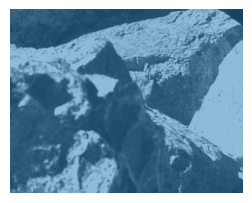

In [8]:
dls.show_batch(max_n=8)

In [9]:
model = smp.Unet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)

In [14]:
learn = Learner(dls, model, loss_func=DiceLoss())

In [8]:
with torch.no_grad():
    torch.cuda.empty_cache()

In [12]:
learn = unet_learner(dls, resnet34)

/home/vskovoroda/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vskovoroda/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
learn.fit(1)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [11]:
learn.fit(5)

epoch,train_loss,valid_loss,time
0,0.026781,0.025074,06:03
1,0.026638,0.023668,06:03
2,0.025066,0.021024,06:02
3,0.024188,0.020016,06:02
4,0.019974,0.020259,06:01


In [ ]:
smp.Unet
smp.UnetPlusPlus
smp.MAnet
smp.Linknet
smp.PSPNet
smp.FPN
smp.PAN
smp.DeepLabV3
smp.DeepLabV3Plus

In [10]:
learn.fit(10)

epoch,train_loss,valid_loss,time
0,7.390676,0.671788,00:22
1,3.031313,0.646121,00:20
2,1.739566,0.640595,00:19
3,1.180953,0.580568,00:19
4,0.895410,0.518434,00:19
5,0.745128,0.538023,00:19
6,0.659185,0.576371,00:19
7,0.603883,0.521982,00:19
8,0.567518,0.561850,00:20
9,0.540553,0.491454,00:20


In [12]:
interp = SegmentationInterpretation.from_learner(learn)

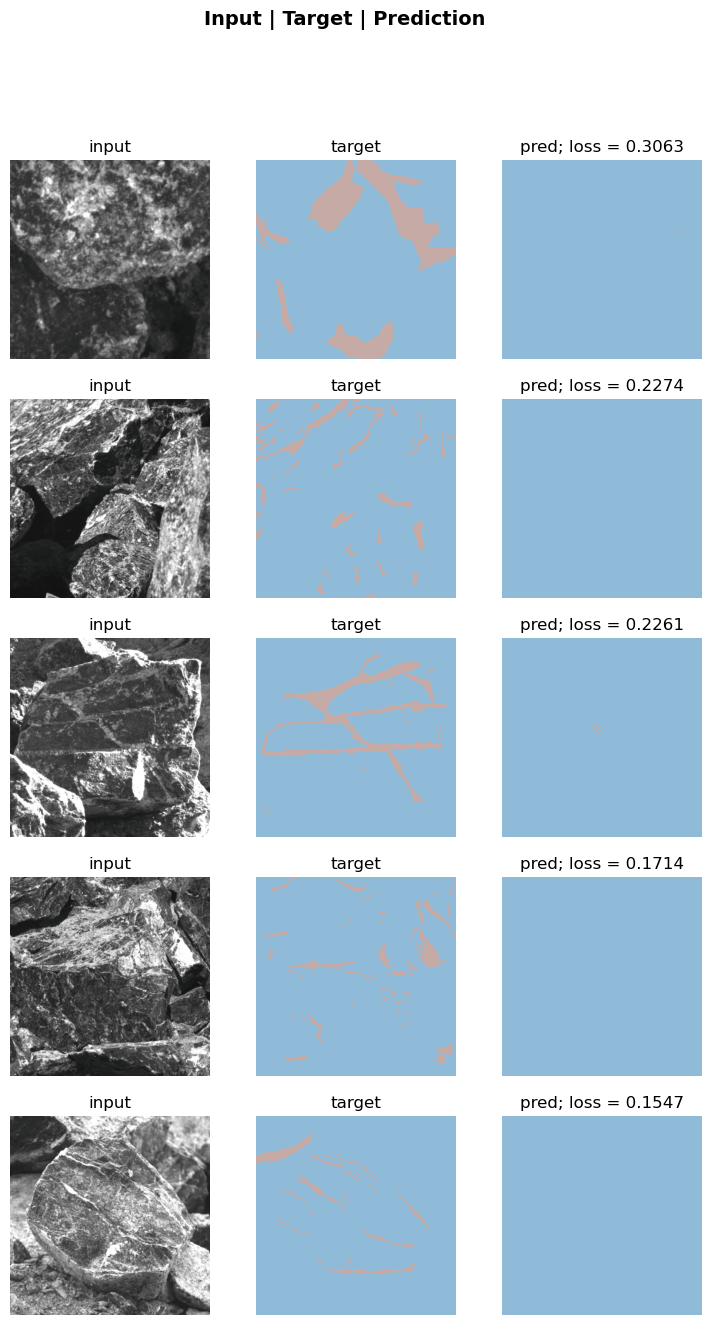

In [13]:
interp.plot_top_losses(k=5)

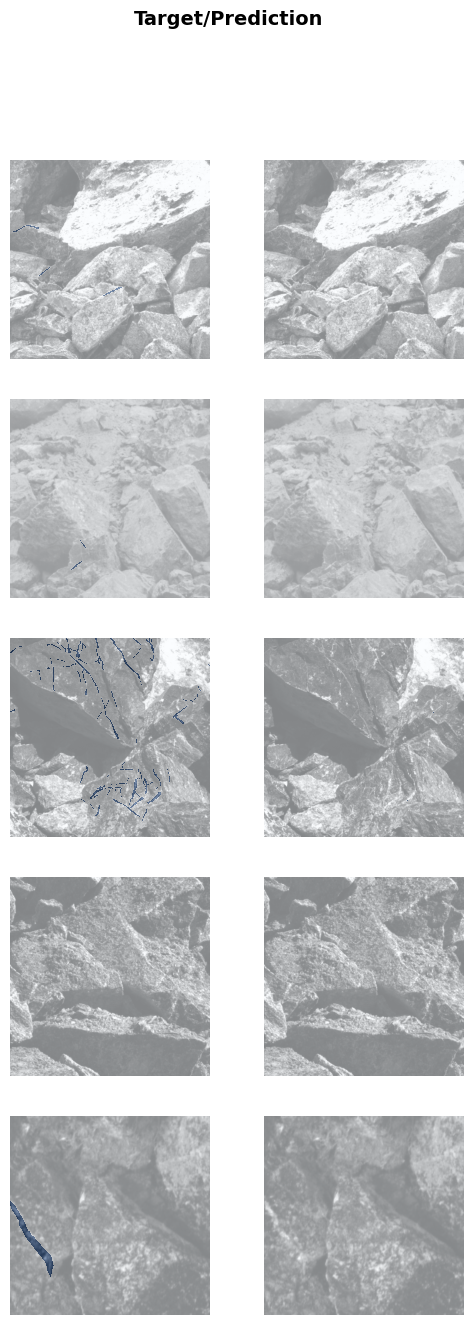

In [14]:
learn.show_results(cmap='Blues', vmin=0, vmax=1)

In [15]:
learn.save('test')

Path('models/test.pth')

In [14]:
learn.load('40blur_7')

In [17]:
path = Path('data')
dls = SegmentationDataLoaders.from_label_func(path = path,
            item_tfms=Resize(600),
            bs = 5,
            batch_tfms=[Normalize.from_stats(*imagenet_stats), aug_transforms],
            fnames = get_image_files(path/'images'),
            label_func = lambda o: get_msk(o), codes = ['no_stone', 'stone'])

In [18]:
learn.dls = dls

In [19]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,time
0,0.904654,0.675507,00:20


epoch,train_loss,valid_loss,time
0,0.622427,0.519079,00:19
1,0.527657,0.459428,00:21


In [22]:
imges_names = (path/'images').ls()
masks_names = (path/'SegmentationClass').ls()

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

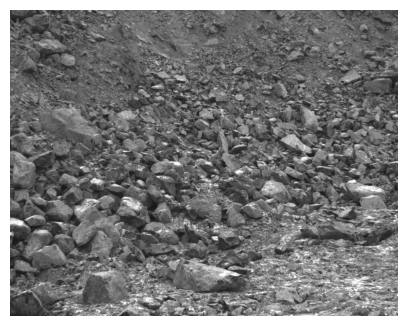

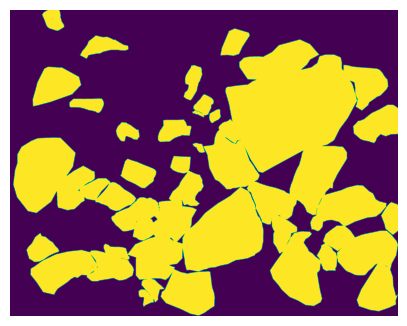

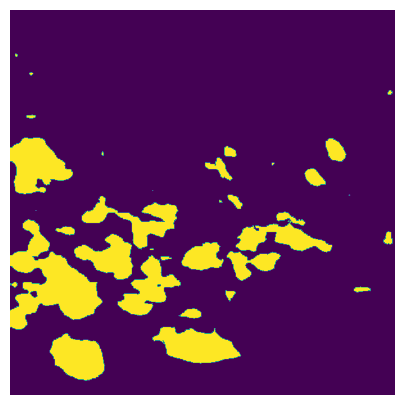

In [23]:
k = 2
img = PILImage.create(imges_names[k])
msk = PILMask.create(masks_names[k])
pred = learn.predict(PILImage.create(imges_names[k]))
show_image(img), show_image(msk), show_image(pred[0])